K-NN (Regression) implementation using the Boston Housing dataset

In [15]:
#import necessary libraries
import pandas as pd #to handle dataframes
import numpy as np #to handle arrays
import matplotlib.pyplot as plt #to plot graphs
import seaborn as sns #to plot graphs
from sklearn.model_selection import train_test_split #to split data into train and test sets
from sklearn.neighbors import KNeighborsRegressor #to implement KNN
from sklearn.preprocessing import StandardScaler #to scale data
from sklearn.impute import SimpleImputer #to handle missing values
from sklearn.metrics import mean_squared_error, r2_score #to evaluate model performance

In [ ]:
#load dataset
df=pd.read_csv('BostonHousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Explanation of the fields in dataset:


---
* CRIM : Crime rate per capita

* ZN : Proportion of residential land zoned for large lots

* INDUS : Proportion of non-retail business acres

* CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

* NOX : Nitric oxide concentration (parts per 10 million)

* RM : Average number of rooms per dwelling

* AGE : Proportion of owner-occupied units built before 1940

* DIS : Weighted distances to five Boston employment centers

* RAD : Index of accessibility to radial highways

* TAX : Full-value property-tax rate per $10,000

* PTRATIO : Pupil-teacher ratio by town

* B : 1000(Bk - 0.63)^2, where Bk is the proportion of Black residents

* LSTAT : % lower status of the population

* MEDV : (Target) Median value of owner-occupied homes in $1000s




In [3]:
#exploring dataset
print("Dataset shape: (rows,columns) ", df.shape)
print("Dataset columns: ", df.columns)
print("Dataset info: ", df.info())
print("Dataset describe: ", df.describe)

Dataset shape: (rows,columns)  (506, 14)
Dataset columns:  Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
Dataset info:  None
Dataset descri

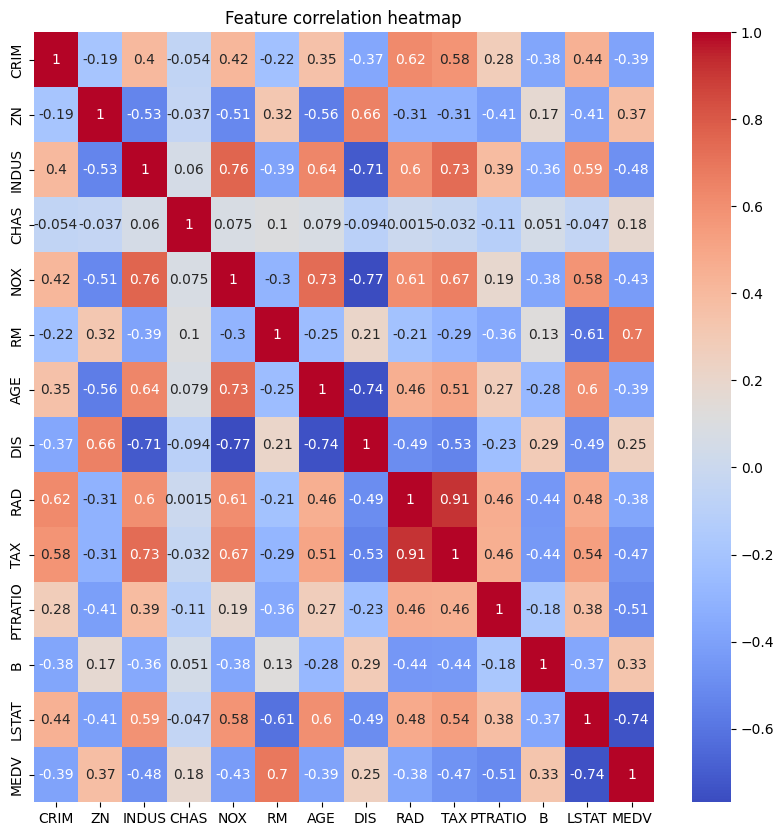

In [4]:
#visualize correlations using heatmap
plt.figure(figsize=(10,10))
plt.title("Feature correlation heatmap")
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [21]:
#define features and target variable
X=df.drop('MEDV', axis=1) #features
y=df['MEDV'] #target (housing price)

In [17]:
#handle missing values
imputer=SimpleImputer(strategy='mean')
X=imputer.fit_transform(X)

In [18]:
#split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
#feature scaling
#scaling is very important since KNN is a distance-based algo
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [22]:
#train the KNN regressor
#for now, we'll try with k=5 neighbours
k=5
knn=KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [23]:
#make predictions
y_pred=knn.predict(X_test_scaled)

In [24]:
#evaluate the model
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R2 score: ", r2)

Mean squared error:  22.374580392156865
R2 score:  0.6948939570833081


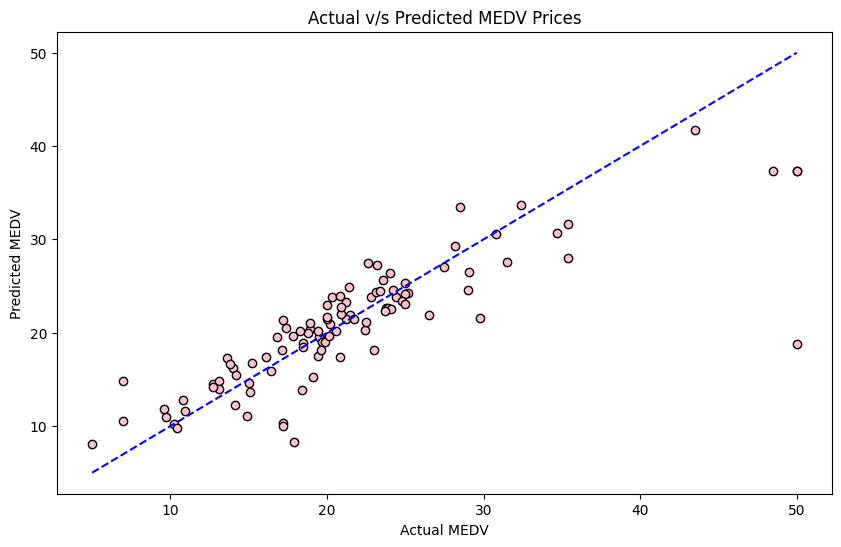

In [26]:
#plot predictions v/s actual
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, c="pink", edgecolors="black")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'b--')
plt.xlabel("Actual MEDV")
plt.ylabel("Predicted MEDV")
plt.title("Actual v/s Predicted MEDV Prices")
plt.show()